In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.shape

(404290, 6)

In [7]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
new_df = df.sample(30000, random_state = 42)


In [9]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [10]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [11]:
new_df.duplicated().sum()

0

is_duplicate
0    18947
1    11053
Name: count, dtype: int64
is_duplicate
0    63.156667
1    36.843333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

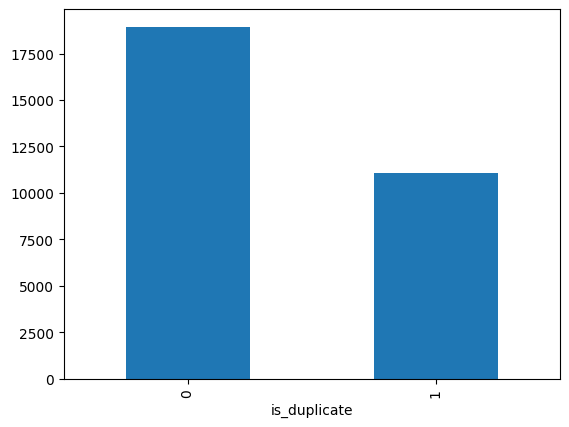

In [12]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind = 'bar')

In [13]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions:', np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions: 55464
Number of questions getting repeated 3372


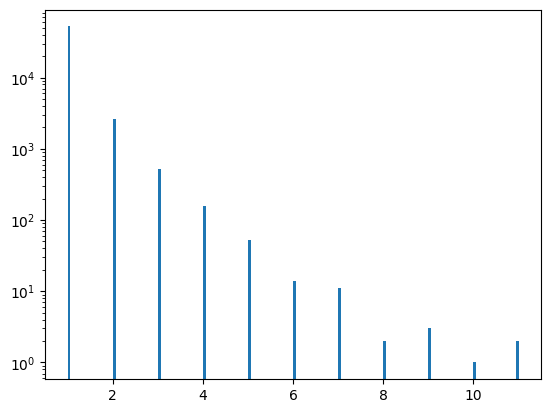

In [14]:
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()

Feature engineering

In [15]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [16]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7


set and lambda function give us words unique in a question1

In [18]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [19]:
new_df['word_common'] = new_df.apply(common_words, axis =1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3


In [20]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [21]:
new_df['total_words'] = new_df.apply(total_words, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16


In [22]:
new_df['word_share'] = round(new_df['word_common']/new_df['total_words'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,53,51,11,9,6,20,0.30
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,96,45,16,8,2,24,0.08
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,44,52,7,9,4,16,0.25
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,38,29,9,7,3,16,0.19


minimum characters 1
maximum characters 334
Average Number of Characters 59.557966666666665


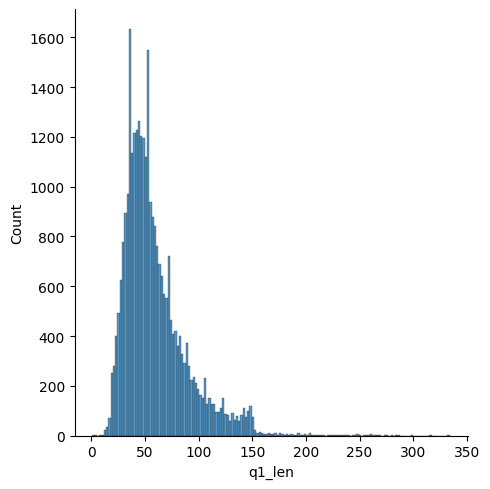

In [23]:
sns.displot(new_df['q1_len'])
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('Average Number of Characters', new_df['q1_len'].mean())

minimum characters 1
maximum characters 1169
Average Number of Characters 59.7301


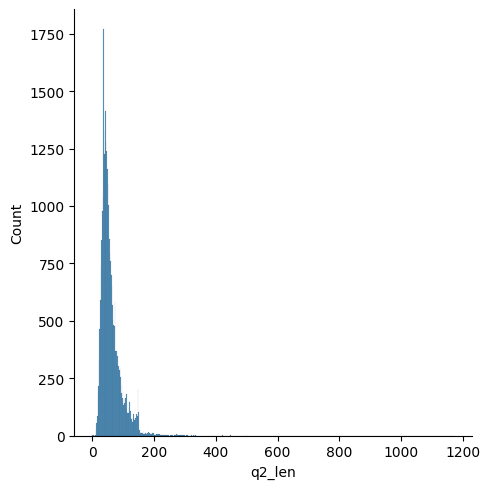

In [24]:
sns.displot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('Average Number of Characters',new_df['q2_len'].mean())

Minimum words 1
Maximum words 67
Average Number of words 10.9456


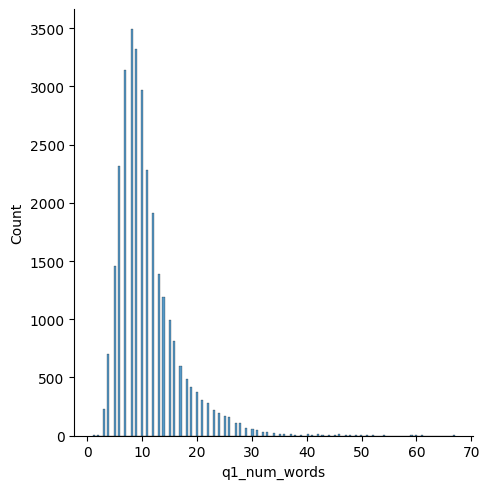

In [25]:
sns.displot(new_df['q1_num_words'])
print('Minimum words', new_df['q1_num_words'].min())
print('Maximum words', new_df['q1_num_words'].max())
print('Average Number of words', new_df['q1_num_words'].mean())

Minimum words 1
Maximum words 228
Average Number of words 11.126233333333333


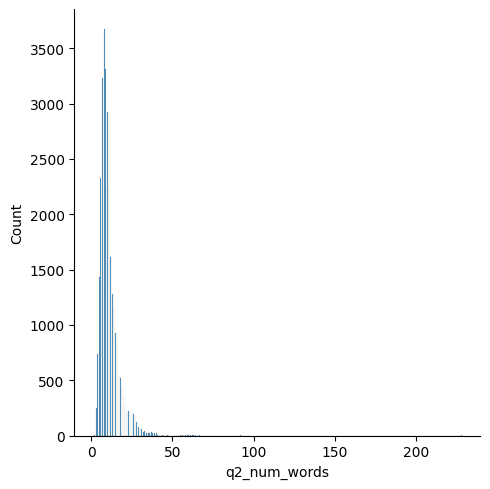

In [26]:
sns.displot(new_df['q2_num_words'])
print('Minimum words', new_df['q2_num_words'].min())
print('Maximum words', new_df['q2_num_words'].max())
print('Average Number of words', new_df['q2_num_words'].mean())

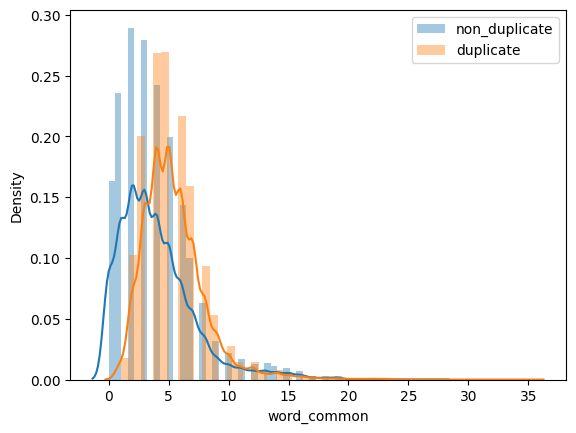

In [27]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'], label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'], label = 'duplicate')
plt.legend()
plt.show()

By observing above graph of word_common and left side of graph was unique words in questions and right side of graph was duplicate words in questions

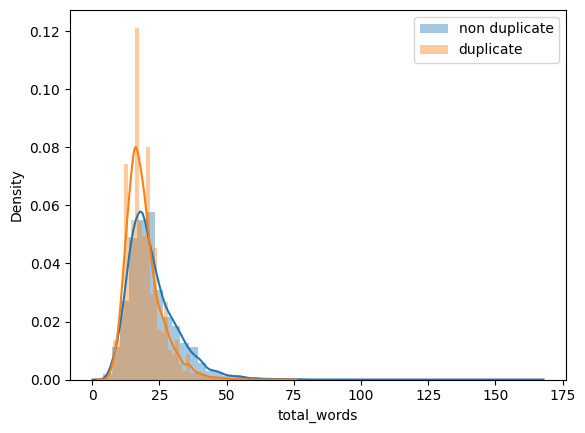

In [28]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words'], label = 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words'], label = 'duplicate')
plt.legend()
plt.show()

By observing above graph, we can say that total_words are more duplicate towards left side of graph and right side of graph are unique words

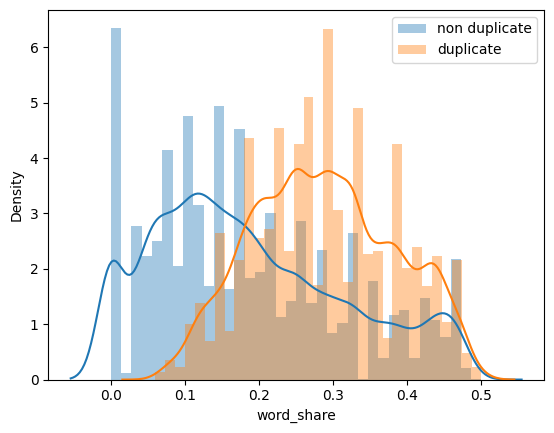

In [29]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label = 'non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'], label = 'duplicate')
plt.legend()
plt.show()

By observing above graph, we can say that this columns will helpful for better understanding of data

In [30]:
question_df = new_df[['question1', 'question2']]
question_df.head()

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...
73186,How close we are to see 3rd world war?,How close is a World War III?


In [31]:
final_df = new_df.drop(columns = ['id','qid1','qid2','question1', 'question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
8067,0,34,34,8,8,7,16,0.44
368101,0,53,51,11,9,6,20,0.30
70497,0,96,45,16,8,2,24,0.08
226567,1,44,52,7,9,4,16,0.25
73186,1,38,29,9,7,3,16,0.19


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(question_df['question1']) + list(question_df['question2'])

cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [33]:
temp_df1 = pd.DataFrame(q1_arr, index = question_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = question_df.index)

temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(30000, 6000)

In [34]:
final_df = pd.concat([final_df, temp_df],axis = 1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,34,34,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,53,51,11,9,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,96,45,16,8,2,24,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,1,44,52,7,9,4,16,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,1,38,29,9,7,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size = 0.2, random_state= 42)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7806666666666666


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7788333333333334


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

In [38]:
from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier()

df.fit(X_train,y_train)

y_pred = df.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7271666666666666


In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[3017,  818],
       [ 819, 1346]], dtype=int64)